This notebook is used to select interesting combinations. <br>
Mainly, the ADS-MDS 2D ranking system is implemented.

# IMPORT LIBRARIES

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [5]:
import python_libraries.score_processing as scorefunc
import python_libraries.plotting_function as plotfunc
import python_libraries.data_loading as loadfunc
import python_libraries.utilities as utils

In [6]:
utils.colourblind()
NMETA = 6
# pyo.init_notebook_mode()

# LOAD DATA

## Select Data

In [7]:
data_path = f'{Path.cwd().parent}/data'
data_selected_path = f'{data_path}/20210716_7_plex'
path_fig = Path.cwd().parents[1]

In [8]:
curve_type_dict = {0: "raw_rb", 
                   1: "norm_curve",
                   2: "fitted_param",
                   3: "fitted_curve",
                   4: "norm_fitted_param",
                   5: "norm_fitted_curve",
                   6: 'c_param',
                   7: 'norm_c_param'}

# select the curve types based on the above dictionary information
selected_curve = 6
CURVE_TYPE = curve_type_dict[selected_curve]

In [9]:
DATA_TYPE = 'singleplex'
# DATA_TYPE = 'multiplex'

COMBO_TYPE = 'all'
# COMBO_TYPE = 'selected'

In [10]:
df_score = pd.read_csv(f'{data_selected_path}/score_data/score_{CURVE_TYPE}_{DATA_TYPE}_{COMBO_TYPE}.csv', index_col = 0)
df_score.head(3)

,PrimerMix,Assay1,Assay2,Assay3,Assay4,Assay5,Assay6,Assay7,Distance1,MDistance1,...,Distance19,MDistance19,Distance20,MDistance20,Distance21,MDistance21,mean,min,mod_mean,mod_min
0,PM7.01,ADE_HEX_03,C22_N_01,CHK_N_02,CNL_N_01,COC_N_01,COV_N_01,MER_N_01,0.036327,5.553279,...,0.05704,3.182576,0.034123,13.885258,0.091163,5.182385,0.079867,0.000308,10.767633,0.087719
1,PM7.02,ADE_HEX_03,C22_N_01,CHK_N_02,CNL_N_01,COC_N_01,COV_N_01,MER_N_02,0.036327,5.553279,...,0.05704,3.182576,0.052102,16.622573,0.109142,5.974536,0.085004,0.000308,11.222429,0.087719
2,PM7.03,ADE_HEX_03,C22_N_01,CHK_N_02,CNL_N_01,COC_N_01,COV_N_01,MER_N_03,0.036327,5.553279,...,0.05704,3.182576,0.039783,14.157413,0.096823,5.395991,0.081484,0.000308,10.789287,0.087719


## Read combination data

In [11]:
combo_dict = {0: 'all',
              1: 'bottom_six',
              2: 'middle_six',
              3: 'top_six',
              4: 'top_mean',
              5: 'top_min'}

In [12]:
combo_group_id = [0]

In [13]:
df_combination = loadfunc.load_selected_combo(data_selected_path, combo_group_id, combo_dict)
df_combination

,ADE,C22,CHK,CNL,COC,COV,MER
Label,,,,,,,
PM7.01,ADE_HEX_03,C22_N_01,CHK_N_02,CNL_N_01,COC_N_01,COV_N_01,MER_N_01
PM7.02,ADE_HEX_03,C22_N_01,CHK_N_02,CNL_N_01,COC_N_01,COV_N_01,MER_N_02
PM7.03,ADE_HEX_03,C22_N_01,CHK_N_02,CNL_N_01,COC_N_01,COV_N_01,MER_N_03
PM7.04,ADE_HEX_03,C22_N_01,CHK_N_02,CNL_N_01,COC_N_01,COV_N_01,MER_N_04
PM7.05,ADE_HEX_03,C22_N_01,CHK_N_02,CNL_N_01,COC_N_01,COV_N_02,MER_N_01
...,...,...,...,...,...,...,...
PM7.4604,ADE_HEX_12,C22_N_02,CHK_N_08,CNL_N_04,COC_N_04,COV_N_02,MER_N_04
PM7.4605,ADE_HEX_12,C22_N_02,CHK_N_08,CNL_N_04,COC_N_04,COV_N_03,MER_N_01
PM7.4606,ADE_HEX_12,C22_N_02,CHK_N_08,CNL_N_04,COC_N_04,COV_N_03,MER_N_02


# COMBO SELECTION

## TOP combo

In [14]:
number_combination = 6
df_largest_combination = scorefunc.get_combination(df_score, df_combination, number_combination)
df_largest_combination

Search 30 to get top 6 combinations.


,ADE,C22,CHK,CNL,COC,COV,MER
Label,,,,,,,
PM7.1286,ADE_HEX_06,C22_N_01,CHK_N_02,CNL_N_04,COC_N_04,COV_N_01,MER_N_02
PM7.1294,ADE_HEX_06,C22_N_01,CHK_N_02,CNL_N_04,COC_N_04,COV_N_03,MER_N_02
PM7.1430,ADE_HEX_06,C22_N_01,CHK_N_04,CNL_N_04,COC_N_04,COV_N_01,MER_N_02
PM7.2151,ADE_HEX_06,C22_N_02,CHK_N_06,CNL_N_04,COC_N_04,COV_N_01,MER_N_03
PM7.2155,ADE_HEX_06,C22_N_02,CHK_N_06,CNL_N_04,COC_N_04,COV_N_02,MER_N_03
PM7.2295,ADE_HEX_06,C22_N_02,CHK_N_08,CNL_N_04,COC_N_04,COV_N_01,MER_N_03
PM7.2299,ADE_HEX_06,C22_N_02,CHK_N_08,CNL_N_04,COC_N_04,COV_N_02,MER_N_03


## BOT combo

In [15]:
number_combination = 6
df_least_combination = scorefunc.get_combination(df_score, df_combination, number_combination, top = 'False')
df_least_combination

Search 166 to get bottom 6 combinations.


,ADE,C22,CHK,CNL,COC,COV,MER
Label,,,,,,,
PM7.1449,ADE_HEX_06,C22_N_01,CHK_N_06,CNL_N_01,COC_N_01,COV_N_03,MER_N_01
PM7.1451,ADE_HEX_06,C22_N_01,CHK_N_06,CNL_N_01,COC_N_01,COV_N_03,MER_N_03
PM7.1593,ADE_HEX_06,C22_N_01,CHK_N_08,CNL_N_01,COC_N_01,COV_N_03,MER_N_01
PM7.1595,ADE_HEX_06,C22_N_01,CHK_N_08,CNL_N_01,COC_N_01,COV_N_03,MER_N_03
PM7.2601,ADE_HEX_09,C22_N_01,CHK_N_06,CNL_N_01,COC_N_01,COV_N_03,MER_N_01
PM7.2602,ADE_HEX_09,C22_N_01,CHK_N_06,CNL_N_01,COC_N_01,COV_N_03,MER_N_02


## MID combo

In [16]:
mean_bias = 0.001
min_bias = 0.001

df_mean_range = [df_score['mean'].max() / 2 - mean_bias, df_score['mean'].max() / 2 + mean_bias]
df_min_range = [0.025 / 2 - min_bias, 0.025 / 2 + min_bias]

df_combo_mean = df_score[(df_score['mean'] > df_mean_range[0]) & (df_score['mean'] < df_mean_range[1])]

df_middle_combo = df_combo_mean[(df_combo_mean['min'] > df_min_range[0]) & (
                                        df_combo_mean['min'] < df_min_range[1])]

df_middle = df_combination[df_combination.index.isin(df_middle_combo['PrimerMix'])]

number_combination = 6
df_middle_combination = scorefunc.get_combination(df_middle_combo, df_middle, number_combination)
df_middle_combination

Search 9 to get top 6 combinations.


,ADE,C22,CHK,CNL,COC,COV,MER
Label,,,,,,,
PM7.1176,ADE_HEX_06,C22_N_01,CHK_N_02,CNL_N_01,COC_N_02,COV_N_03,MER_N_04
PM7.1191,ADE_HEX_06,C22_N_01,CHK_N_02,CNL_N_02,COC_N_01,COV_N_01,MER_N_03
PM7.1318,ADE_HEX_06,C22_N_01,CHK_N_04,CNL_N_01,COC_N_02,COV_N_03,MER_N_02
PM7.1319,ADE_HEX_06,C22_N_01,CHK_N_04,CNL_N_01,COC_N_02,COV_N_03,MER_N_03
PM7.1339,ADE_HEX_06,C22_N_01,CHK_N_04,CNL_N_02,COC_N_01,COV_N_02,MER_N_03
PM7.2203,ADE_HEX_06,C22_N_02,CHK_N_08,CNL_N_02,COC_N_01,COV_N_02,MER_N_03
PM7.4516,ADE_HEX_12,C22_N_02,CHK_N_08,CNL_N_02,COC_N_02,COV_N_01,MER_N_04


In [17]:
# df_largest_combination.to_csv(f'{data_selected_path}/selected_combinations/top_six.csv')
# df_least_combination.to_csv(f'{data_selected_path}/selected_combinations/bottom_six.csv')
# df_middle_combination.to_csv(f'{data_selected_path}/selected_combinations/middle_six.csv')

# PLOTLY: 2D VISUALIZATION

In [20]:
mid = df_score.loc[df_score["PrimerMix"].isin(df_middle_combination.index)]
best = df_score.loc[df_score["PrimerMix"].isin(df_largest_combination.index)]
bot = df_score.loc[df_score["PrimerMix"].isin(df_least_combination.index)]
 
path_combo = f'{data_selected_path}/score_data/score_c_param_singleplex_selected.csv'
other = pd.read_csv(path_combo, index_col=0)
other = other.loc[~other["PrimerMix"].isin(best.PrimerMix)]
other = other.loc[~other["PrimerMix"].isin(mid.PrimerMix)]
other = other.loc[~other["PrimerMix"].isin(bot.PrimerMix)]
other_ave = other.loc[other.PrimerMix.isin(['PM7.2014',"PM7.2302","PM7.2303"])]
other_min = other.loc[~other.PrimerMix.isin(['PM7.2014',"PM7.2302","PM7.2303"])]

In [21]:
med_ads = df_score['mean'].median()
std_ads = df_score['mean'].std()

med_mds = df_score['min'].median()
std_mds = df_score['min'].std()

bound_ads = med_ads + std_ads
bound_mds = med_mds + 2*std_mds

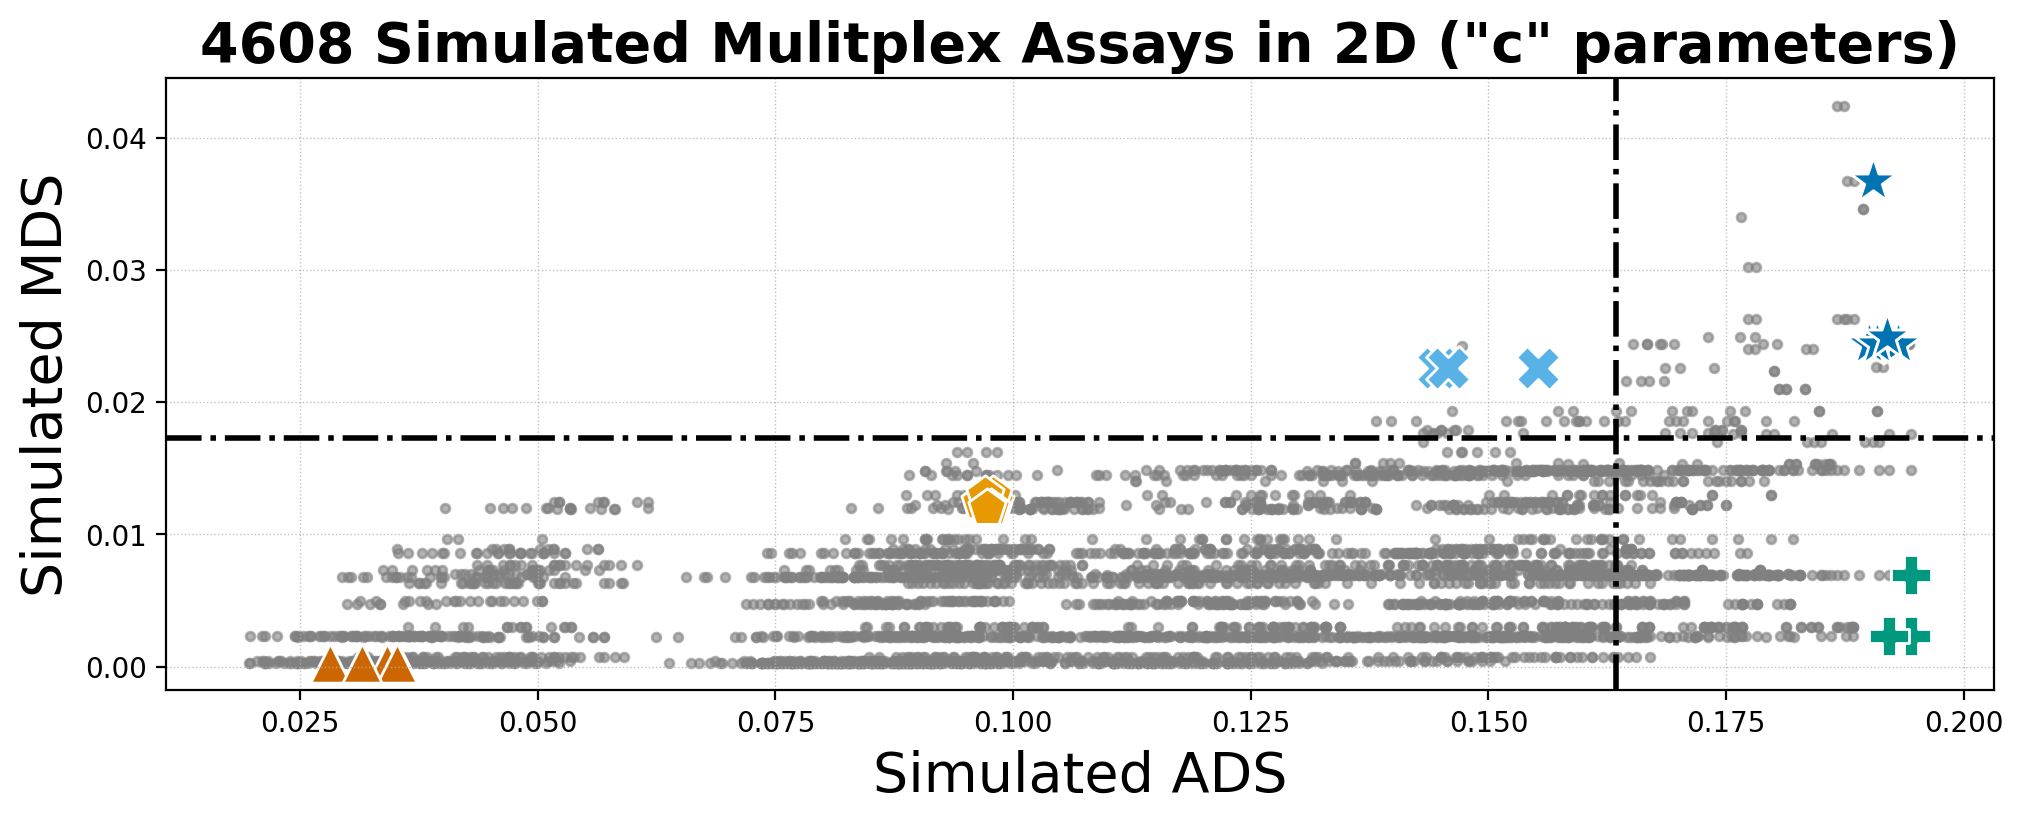

In [22]:
markers = ["P", "*", "X", "p", "^"]
pm_types = ['TOP-ADS', 'BEST', 'TOP-MDS', 'MID', 'BOT']
colors = ['C02', 'C00', 'C04', 'C03', 'C01']


fig, ax = plt.subplots(1,1, figsize=(10,4), dpi=200, constrained_layout=True)

ax.set_title(f'{df_score.shape[0]} Simulated Mulitplex Assays in 2D ("c" parameters)', 
             size=20, weight="bold")

ax.scatter(df_score['mean'], df_score['min'], s=10, color='gray', alpha=0.6)
ax.scatter(best['mean'], best['min'], s=300, color='C00', marker=markers[1], alpha=1, edgecolors='white')
ax.scatter(mid['mean'], mid['min'], s=200, color='C01', marker=markers[3], alpha=1, edgecolors='white')
ax.scatter(bot['mean'], bot['min'], s=200, color='C03', marker=markers[4], alpha=1, edgecolors='white')
ax.scatter(other_ave['mean'], other_ave['min'], s=200, marker=markers[0], color='C02', alpha=1, edgecolors='white')
ax.scatter(other_min['mean'], other_min['min'], s=250, marker=markers[2], color='C04', alpha=1, edgecolors='white')

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

ax.hlines(bound_mds, xmin=xmin, xmax=xmax, zorder=4, clip_on=False, ls="-.", lw=2, color='black')
ax.vlines(bound_ads, ymin=ymin, ymax=ymax, zorder=4, clip_on=False, ls="-.", lw=2, color='black')

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.grid(alpha=0.8, ls=":", lw=0.5)

ax.set_xlabel('Simulated ADS', size=20)
ax.set_ylabel('Simulated MDS', size=20)

plt.show()
# fig.savefig(path_fig / "02_figures" / "figure5" / "2D_plot.pdf")
# plt.close()

# COMBINATION VISUALIZATION

In [18]:
singleplex_dict = {0: '20210706_01'}

DATA_TYPE = 'singleplex'

id_key = [0]

In [19]:
exp_id_list = utils.list_from_key(singleplex_dict, id_key)

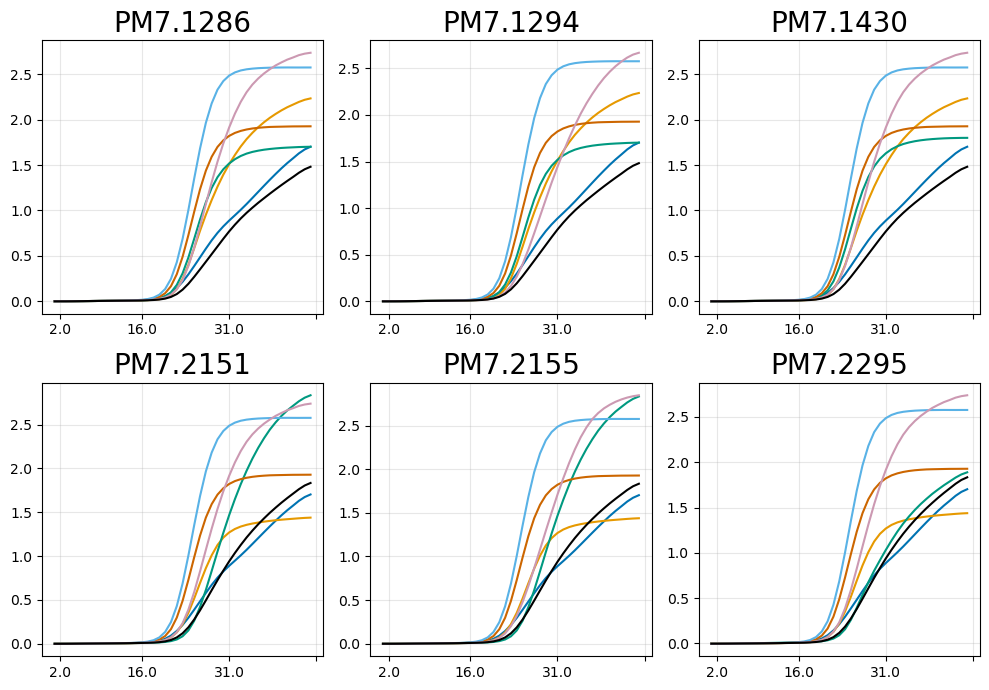

In [39]:
import math
import numpy as np
def combination_plot(folder_path, exp_id, df_combination, NMETA, x_label='', y_label='', size=(10, 7), dpi=100,
                     col_number=3, title_font=20, label_font=10, legend=False, alpha=0.3):
    """
    Plot median curves for all targets in a combination.
    This is used for visualization of selected combination, and will give an intuition how "good" a combination is.
    "Good" means the combo may performance well in ACA classifier development.

    params:
    - folder_path: file path for processed data
    - exp_id: list of experiment ID to load data from
    - df_combination: dataframe containing all combination information (primers)
    - NMETA: number of metadata columns
    - x_label: label for x-axis
    - y_label: label for y-axis
    - size: size of the figure (default: (10, 7))
    - dpi: dpi of the figure (default: 100)
    - col_number: number of subplots on each row (default: 3)
    - title_font: size of figure title (default: 20)
    - label_font: size of label (default: 10)
    - legend: if to show legend or not (default: False)
    - alpha: transparency of grid (default: 0.3)

    return plots
    """
    row_number = math.ceil(df_combination.shape[0] / col_number)
    
    fig, axs = plt.subplots(row_number, col_number, figsize=size, dpi=dpi)

    x_interval = 4
    
    df_curve = loadfunc.load_processed_data_by_expid(folder_path, exp_id, 'raw_rb')
    
    colormap = [f'C0{i}' for i in range(len(df_curve['Target'].unique()))]
    
    for row in range(row_number):
        for col in range(col_number):
            if row * col_number + col < df_combination.shape[0]:
                df_temp = df_curve[df_curve['Assay'].isin(df_combination.iloc[row * col_number + col, :].values)]
                target_counter = 0
                for assay, assay_df in df_temp.groupby('Assay'):
                    axs[row, col].plot(assay_df.iloc[:, NMETA:].T.median(axis = 1),
                                       color = colormap[target_counter], label = assay)
                    target_counter = target_counter + 1
                axs[row, col].set_xlabel(x_label, size = label_font)
                axs[row, col].set_ylabel(y_label, size = label_font)
                axs[row, col].set_title(df_combination.index.tolist()[row * col_number + col], size = title_font)
                axs[row, col].set_xticks(np.linspace(1, 45, x_interval, dtype=int))
                axs[row, col].grid(alpha = alpha)

                if legend == True:
                    axs[row, col].legend()

    plt.tight_layout()
    plt.show()
    fig.savefig('luca.pdf')

combination_plot(data_selected_path, exp_id_list, 
                          df_largest_combination.iloc[0 : 6, :], NMETA, legend=False)


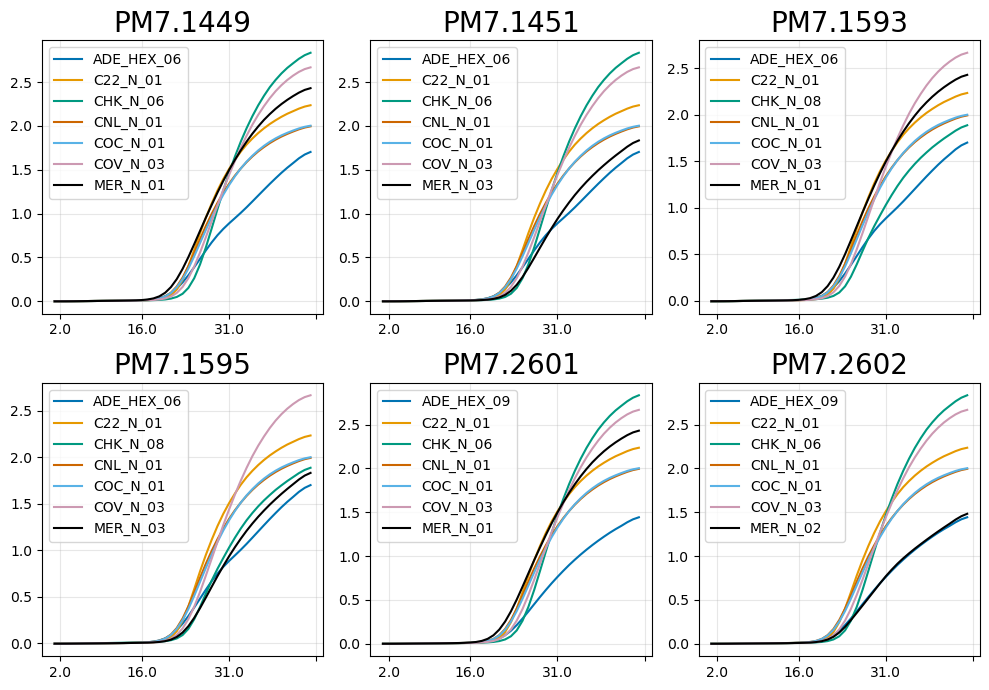

In [26]:
plotfunc.combination_plot(data_selected_path, exp_id_list, 
                          df_least_combination.iloc[0 : 6, :], NMETA, legend=True)